# Support Vector Machines
# classify the Size_Categories using SVM

In [36]:
#import Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [37]:
#import Data
data = pd.read_csv("forestfires.csv")

In [38]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [39]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [40]:
label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [41]:
data['day'] = label_encoder.fit_transform(data['day'])
data['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

# Support Vector Machine

In [42]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0)

In [43]:
train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
390,3,1,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,...,1,0,0,0,0,0,0,0,0,large
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
141,1,6,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
268,1,5,92.1,152.6,658.2,14.3,21.0,32,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
135,1,2,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,...,0,0,0,0,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,7,0,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,...,0,0,0,0,1,0,0,0,0,small
277,2,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,...,0,0,0,0,0,0,0,0,0,large
9,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small
359,11,0,92.5,122.0,789.7,10.2,21.1,39,2.2,0.0,...,0,0,0,0,0,0,0,0,1,large


In [44]:
train.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0,361.000000,361.000000
mean,5.761773,2.739612,90.732964,111.099169,541.738504,9.054017,18.861773,43.955679,3.948476,0.026593,...,0.022161,0.027701,0.005540,0.072022,0.033241,0.121884,0.005540,0.0,0.033241,0.315789
std,4.299713,1.886740,5.587625,64.584362,250.590063,4.763570,5.864515,16.467923,1.805871,0.349224,...,0.147410,0.164342,0.074329,0.258883,0.179514,0.327605,0.074329,0.0,0.179514,0.465475
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,90.300000,56.700000,430.800000,6.500000,15.500000,32.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.400000,661.300000,8.400000,19.400000,41.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,11.000000,4.000000,92.900000,142.400000,713.000000,10.700000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,11.000000,6.000000,96.200000,290.000000,855.300000,56.100000,33.100000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [45]:
test

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
213,7,1,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,...,0,0,0,0,1,0,0,0,0,large
435,5,2,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,...,0,0,1,0,0,0,0,0,0,small
343,11,1,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,...,0,0,0,0,0,0,0,0,1,small
230,11,6,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,...,0,0,0,0,0,0,0,0,1,large
171,1,6,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,11,0,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,...,0,0,0,0,0,0,0,0,1,small
208,11,0,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,...,0,0,0,0,0,0,0,0,1,large
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
331,11,2,91.2,124.4,795.3,8.5,21.5,28,4.5,0.0,...,0,0,0,0,0,0,0,0,1,large


In [46]:
test.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.0,156.000000,156.000000,156.000000,156.0,156.000000,156.000000,156.000000
mean,5.750000,2.730769,90.440385,110.347436,562.291026,8.946795,18.952564,45.057692,4.177564,0.010256,...,0.006410,0.064103,0.0,0.038462,0.032051,0.064103,0.0,0.006410,0.019231,0.371795
std,4.553092,2.017172,5.372736,62.986700,242.309564,4.061470,5.688533,15.989610,1.753580,0.090289,...,0.080064,0.245724,0.0,0.192927,0.176704,0.245724,0.0,0.080064,0.137777,0.484840
min,0.000000,0.000000,50.400000,2.400000,15.500000,0.400000,4.200000,19.000000,0.400000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.100000,78.500000,510.875000,6.550000,15.550000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5.000000,3.000000,91.600000,108.000000,665.450000,8.500000,19.100000,43.000000,4.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,11.000000,4.000000,92.900000,141.200000,714.000000,11.450000,22.100000,53.250000,5.400000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,11.000000,6.000000,96.100000,291.300000,860.600000,18.000000,33.300000,99.000000,9.400000,0.800000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [47]:
train_X = train.iloc[:,:-1]
train_Y = train.iloc[:,-1]

In [48]:
test_X = test.iloc[:,:-1]
test_Y = test.iloc[:,-1]

In [49]:
train_X.shape, train_Y.shape

((361, 30), (361,))

In [50]:
test_X.shape, test_Y.shape

((156, 30), (156,))

# Linear Support Vector Machine

In [51]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X, train_Y)
pred_test_linear = model_linear.predict(test_X)

In [52]:
np.mean(pred_test_linear == test_Y)

0.967948717948718

# Radical Support Vector Machine

In [53]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(train_X, train_Y)
pred_test_linear = model_linear.predict(test_X)

In [54]:
np.mean(pred_test_linear == test_Y)

0.7243589743589743

In [55]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma':[50,5,10,0,5,0,1],'C':[25,22,20,18,16,15,14,13,12,11,10,0,1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 980.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 22, 20, 18, 16, 15, 14, 13, 12, 11, 10, 0,
                                1, 0.001],
                          'gamma': [50, 5, 10, 0, 5, 0, 1],
                          'kernel': ['rbf']}])

In [56]:
gsv.best_params_,gsv.best_score_

({'C': 25, 'gamma': 1, 'kernel': 'rbf'}, 0.7479729729729729)

# Poly SVC Model

In [57]:
model_linear = SVC(kernel = "poly")
model_linear.fit(train_X, train_Y)
pred_test_linear = model_linear.predict(test_X)

In [58]:
np.mean(pred_test_linear == test_Y)

0.7564102564102564

In [59]:
clf = SVC(C=22, gamma = 0.1)
clf.fit(train_X,train_Y)
pred_y = clf.predict(test_X)

In [60]:
accuracy = accuracy_score(test_Y, pred_y)*100
accuracy

71.15384615384616

In [61]:
confusion_matrix(test_Y, pred_y)

array([[  1,  45],
       [  0, 110]])

In [62]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

       large       1.00      0.02      0.04        46
       small       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.85      0.51      0.44       156
weighted avg       0.80      0.71      0.60       156



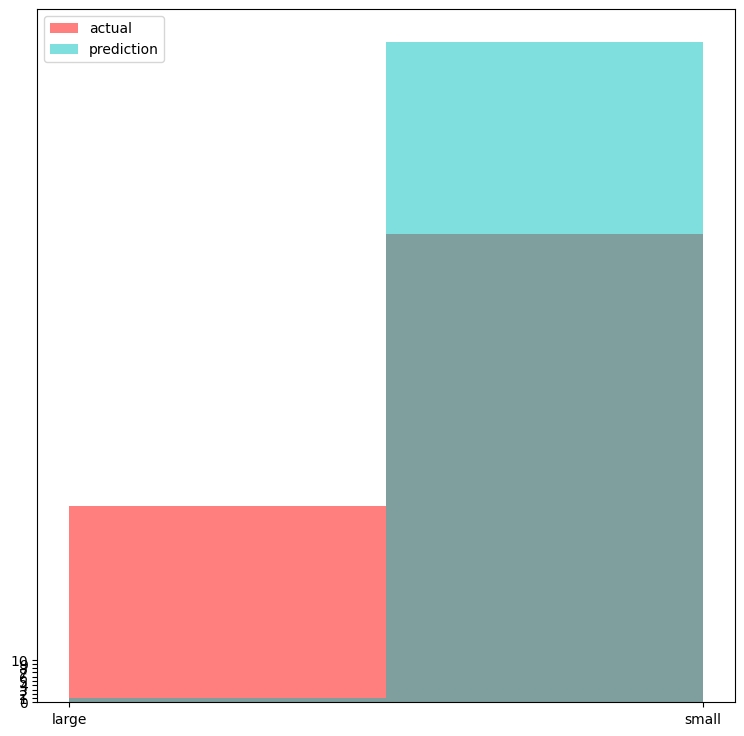

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(test_Y, color = 'r',alpha = 0.5, label = 'actual', bins = 2)
ax.hist(pred_y, color = 'c',alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Poly SVC Model predict test dataset with 71.15% accuracy